In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic.shape[0]

891

In [5]:
print("The median value of Age column: ", titanic["Age"].median(skipna = True))
print("The percentage of missing records in cabin is: ", titanic["Cabin"].isnull().sum() / titanic.shape[0]*100)
print("The most common boarding point is: ", titanic["Embarked"].value_counts().idxmax())

The median value of Age column:  28.0
The percentage of missing records in cabin is:  77.10437710437711
The most common boarding point is:  S


In [6]:
titanic["Age"].fillna(titanic["Age"].median(skipna = True), inplace = True)
titanic.drop("Cabin", axis = 1, inplace = True)

titanic["Embarked"].fillna(titanic["Embarked"].value_counts().idxmax(), inplace = True)

In [7]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
lrmodel = LogisticRegression()
titanic.drop("PassengerId", axis = 1, inplace = True)
titanic.drop("Name", axis = 1, inplace = True)
titanic.drop("Ticket", axis = 1, inplace = True)
titanic.drop("SibSp", axis = 1, inplace = True)
titanic.drop("Parch", axis = 1, inplace = True)

In [9]:
label_encoder = preprocessing.LabelEncoder()
titanic["Sex"] = label_encoder.fit_transform(titanic["Sex"])
titanic["Embarked"] = label_encoder.fit_transform(titanic["Embarked"])

In [10]:
X = titanic[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
Y = titanic["Survived"]

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
lrmodel.fit(xtrain, ytrain)

LogisticRegression()

In [13]:
ypred = lrmodel.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.80      0.66      0.72        79

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



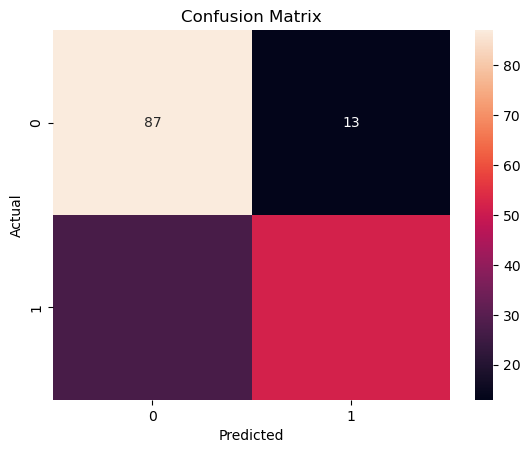

In [14]:
matrix = confusion_matrix(ytest,ypred)
sns.heatmap(matrix,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()